In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:

blood_sugar = ctrl.Antecedent(np.arange(50, 251, 1), 'blood_sugar')
bmi = ctrl.Antecedent(np.arange(10, 41, 1), 'bmi')
urination = ctrl.Antecedent(np.arange(0, 11, 1), 'urination')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')
risk = ctrl.Consequent(np.arange(0, 100, 1), 'risk')


In [ ]:

blood_sugar['low'] = fuzz.trimf(blood_sugar.universe, [50, 50, 80])
blood_sugar['normal'] = fuzz.trimf(blood_sugar.universe, [70, 100, 130])
blood_sugar['high'] = fuzz.trimf(blood_sugar.universe, [120, 160, 200])
blood_sugar['very_high'] = fuzz.trimf(blood_sugar.universe, [180, 250, 250])

bmi['underweight'] = fuzz.trimf(bmi.universe, [10, 10, 18.5])
bmi['normal'] = fuzz.trimf(bmi.universe, [18, 22, 25])
bmi['overweight'] = fuzz.trimf(bmi.universe, [24, 28, 30])
bmi['obese'] = fuzz.trimf(bmi.universe, [29, 35, 40])

urination['rarely'] = fuzz.trimf(urination.universe, [0, 0, 4])
urination['sometimes'] = fuzz.trimf(urination.universe, [3, 5, 7])
urination['often'] = fuzz.trimf(urination.universe, [6, 10, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 4])
fatigue['moderate'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 10, 10])

risk['low'] = fuzz.trimf(risk.universe, [0, 20, 40])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trimf(risk.universe, [60, 80, 90])
risk['very_high'] = fuzz.trimf(risk.universe, [85, 95, 100])


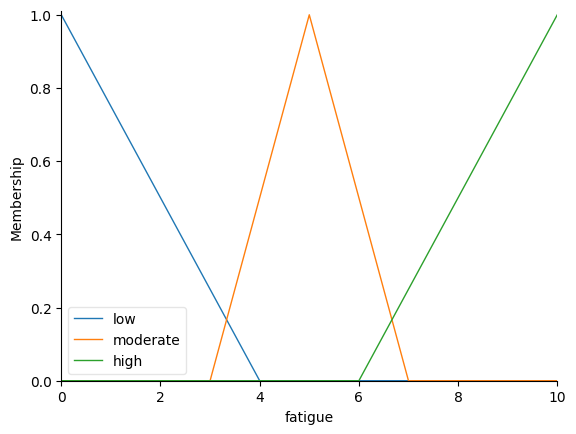

In [ ]:
fatigue.view()

In [ ]:

# Tạo các quy tắc mờ
rule1 = ctrl.Rule(blood_sugar['very_high'] & urination['often'], risk['very_high'])
rule2 = ctrl.Rule(blood_sugar['very_high'] & urination['sometimes'], risk['high'])
rule3 = ctrl.Rule(blood_sugar['high'] & urination['often'], risk['high'])
rule4 = ctrl.Rule(blood_sugar['normal'] & urination['rarely'], risk['low'])

rule5 = ctrl.Rule(blood_sugar['very_high'] & bmi['obese'], risk['very_high'])
rule6 = ctrl.Rule(blood_sugar['very_high'] & bmi['overweight'], risk['high'])
rule7 = ctrl.Rule(blood_sugar['high'] & bmi['overweight'], risk['medium'])
rule8 = ctrl.Rule(blood_sugar['normal'] & bmi['normal'], risk['low'])

rule9 = ctrl.Rule(blood_sugar['very_high'] & fatigue['high'], risk['very_high'])
rule10 = ctrl.Rule(blood_sugar['high'] & fatigue['high'], risk['high'])
rule11 = ctrl.Rule(blood_sugar['high'] & fatigue['moderate'], risk['medium'])
rule12 = ctrl.Rule(blood_sugar['normal'] & fatigue['low'], risk['low'])


80.85891525487644


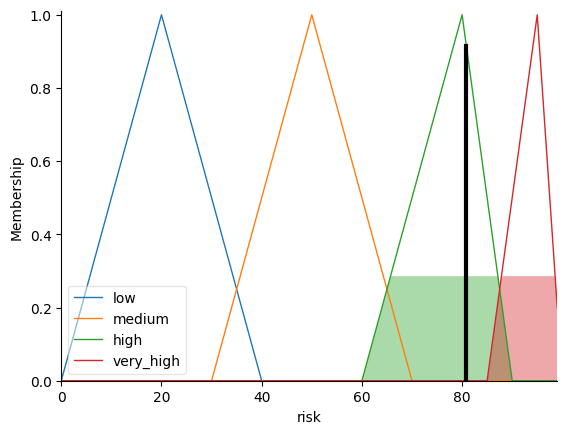

In [ ]:

risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
risk_simulation = ctrl.ControlSystemSimulation(risk_ctrl)

risk_simulation.input['blood_sugar'] = 200
risk_simulation.input['bmi'] = 29
risk_simulation.input['urination'] = 10
risk_simulation.input['fatigue'] = 7

risk_simulation.compute()
print(risk_simulation.output['risk'])

# Hiển thị đồ thị
risk.view(sim=risk_simulation)
